### Relatório de Introdução à Ciência de Dados

## Tema: Aplicações de Ciência de Dados na Steam

#### Integrantes: Vinícius Vieri, Ítalo Nicácio e Herbet Gomes.


#### Professor: Yuri Malheiros.

## Introdução

Durante nossa pesquisa passamos por vários datasets, entre eles, vários com temas importantíssimos para a sociedade. Datasets sobre saúde, economia e educação.
Porém, nos deparamos com o dataset da Steam, e pensamos, por que não?

Acredito que a maioria dos jovens hoje em dia e antigamente sempre gostou de jogar de vez em quando, então eu me pergunto(e vos pergunto), não seria minimamente interessante descobrir um pouco mais sobre a plataforma que alegrou(e ainda alegra) nossos momentos de diversão, novas amizades e interação? Muitos amigos(e "inimigos") que tenho até hoje foram feitos através da steam.

Nossa resposta é sim, uma pequena parte que o conhecimento da ciência de dados pode prover está aqui, então a curiosidade e o carinho por plataformas como essa nos moveram até a escolha dele. Temos como objetivo justamente explorar nossa criatividade e analisar coisas que só pensávamos e deduzíamos, só que desta vez utilizando dados e vendo que de fato, são reais, ou nos frustrando, mas ainda com felicidade, por perceber que estávamos errados.

## Dados usados

O dataset que usamos pode ser encontrado no Kaggle através do link: https://www.kaggle.com/datasets/nikdavis/steam-store-games

Mas, primeiramente, o que é a Steam? 

De acordo com o site Tecnoblog, a Steam é "uma plataforma de distribuição de jogos digitais para computadores (Windows, macOS e Linux). Foi uma das primeiras de seu gênero a ser lançada e permite que consumidores comprem ou ativem jogos dentro do serviço. Possui um programa cliente, que deve ser instalado no computador, para que os jogos possam ser executados, mantendo tudo atualizado. Além de loja digital, funciona também como rede social."

Então, o dataset que usaremos possui dados como avaliações positivas e negativas, nomes dos jogos, média de horas jogadas, gêneros dos jogos e etc.

## Pré-processamento

Inicialmente, ficamos felizes em perceber que o dataset já estava limpo em questão de arquivos NaN por exemplo. Porém, isso não quer dizer que não precisaríamos. Já na parte de transformação, isso será feito no decorrer do relatório, no momento da plotagem de gráficos de barras ou de kmeans ou regressão. Basicamente, iremos usar alguma coisa do tipo para responder nossas perguntas. 

Mas, inicialmente, o Dataset foi pego como assim, então não precisaremos usar drops para NaN ou Null aqui. Futuramente formaremos novos datasets a partir deste, para nossa visualização ter qualidade. Ou seja, futuramente iremos manipular ou limpar alguma coisa do dataset, principalmente para agrupamento e uso do kmeans.

## Perguntas

## Respostas

### 1. Primeira pergunta

#### Levando em consideração o dataset usado, responda;

#### •Quais são os 5 jogos com mais avaliações positivas brutas?.
#### •Quais são os 5 jogos com mais avaliações negativas brutas?.
#### •Quais são os 5 jogos com mais avaliações positivas em realação às negativas?.

In [79]:
# Importando bibliotecas que eu possa precisar e dando uma olhada no dataframe.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv("....steam.csv") diretório de acesso.
df = pd.read_csv("C:/Users/vinic/Mynotebooks/Projeto_ICD/steam.csv")
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


### Quais são os 5 jogos com mais avaliações positivas brutas?.

In [58]:
# Criando um novo dataframe com os 5 primeiros jogos ordenados na ordem descrescente, ou seja do maior para o menor.

x = df['name']
y = df['positive_ratings']

df_barra = df.sort_values(by='positive_ratings',ascending=False).head(5)
df_barra
df_barra

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.00
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.00
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
121,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99


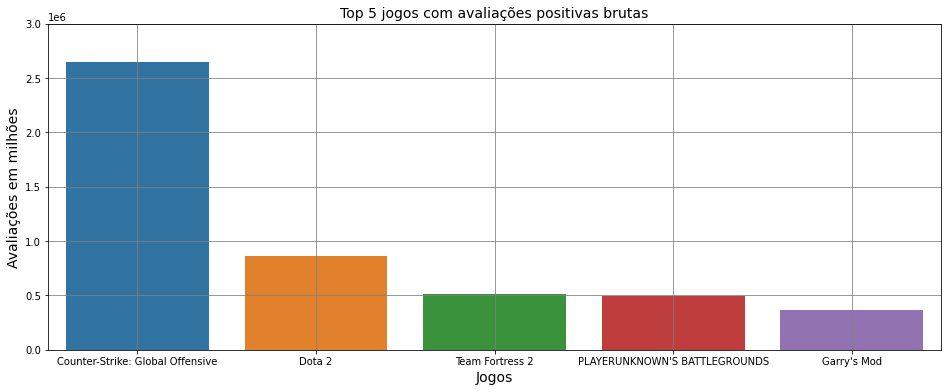

In [145]:
#plt.figure(figsize=(16,6))
#plot=sns.barplot(data=df_barra , x="name", y="positive_ratings", ci=False)
#plt.title("Top 5 jogos com avaliações positivas brutas")
#plt.show()


plt.figure(figsize=(16,6))
plot=sns.barplot(data=df_barra , x="name", y="positive_ratings", ci=False)
plt.title("Top 5 jogos com avaliações positivas brutas",fontsize=14)
plt.xlabel("Jogos",fontsize=14)
plt.ylabel("Avaliações em milhões", fontsize=14)
plt.ylim(0,3_000_000)
plt.grid(color="gray")

### Quais são os 5 jogos com mais avaliações negativas brutas?.

In [57]:
# Criando um novo dataframe com os 5 primeiros jogos ordenados na ordem decrescente, ou seja do menor para o maior.
x2 = df['name']
y2 = df["negative_ratings"]

df_barra_negative = df.sort_values(by="negative_ratings", ascending=False).head(5)
df_barra_negative

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.00
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00
2478,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,329061,139308,9837,4834,10000000-20000000,24.99
7809,433850,Z1 Battle Royale,2018-02-28,1,NantG,Daybreak Game Company,windows,0,Multi-player;Online Multi-Player;In-App Purchases,Action;Adventure;Free to Play;Massively Multip...,Survival;Massively Multiplayer;Multiplayer,0,111434,91664,3142,162,10000000-20000000,0.00


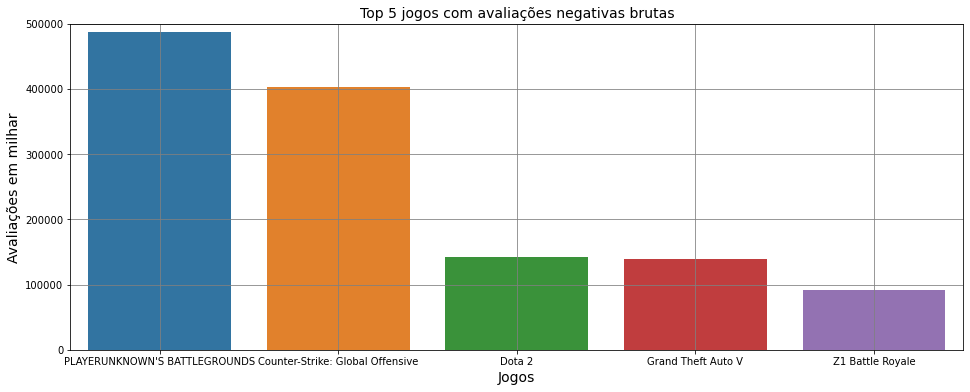

In [138]:
#plt.figure(figsize=(16,6))
#plot=sns.barplot(data=df_barra_negative , x="name", y="negative_ratings", ci=False)
#plt.title("Top 5 jogos com avaliações negativas brutas")
#plt.show()


plt.figure(figsize=(16,6))
plot=sns.barplot(data=df_barra_negative , x="name", y="negative_ratings", ci=False)
plt.title("Top 5 jogos com avaliações negativas brutas",fontsize=14)
plt.xlabel("Jogos",fontsize=14)
plt.ylabel("Avaliações em milhar", fontsize=14)
plt.ylim(0,500_000)
plt.grid(color="gray")

### Quais são os 5 jogos com mais avaliações positivas em realação às negativas?.

In [96]:
# Criando uma nova coluna com os 5 primeiros jogos ordenados na ordem descrescente, ou seja do maior para o menor.
# Depois, será atribuido à um novo dataframe com apenas os 5 primeiros.

df["avaliacao_total"] = df["positive_ratings"] - df["negative_ratings"]

In [97]:
#x=["name"]
#y=["avaliacao_total"]

avaliacao_total = df.sort_values(by="avaliacao_total", ascending=False).head(5)
df_avaliacao_total

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,avaliacao_total
25,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,2644404,402313,22494,6502,50000000-100000000,0.00,2242091
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.00,721428
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.00,481843
121,4000,Garry's Mod,2006-11-29,1,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,29,363721,16433,12422,1875,10000000-20000000,6.99,347288
3362,304930,Unturned,2017-07-07,1,Smartly Dressed Games,Smartly Dressed Games,windows;mac;linux,0,Single-player;Online Multi-Player;Online Co-op...,Action;Adventure;Casual;Free to Play;Indie,Free to Play;Survival;Zombies,46,292574,31482,3248,413,20000000-50000000,0.00,261092


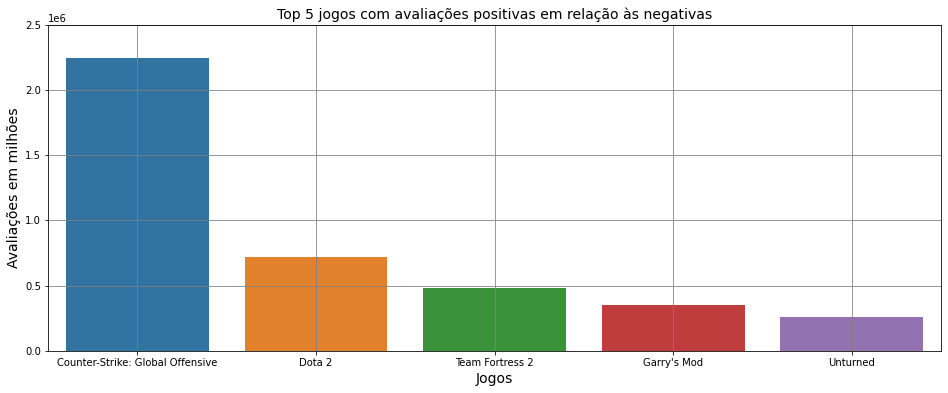

In [195]:
# Plotando o gráfico de barras usando a coluna criada no df.

plt.figure(figsize=(16,6))
plot=sns.barplot(data=df_avaliacao_total , x="name", y="avaliacao_total", ci=False)
plt.title("Top 5 jogos com avaliações positivas em relação às negativas",fontsize=14)
plt.xlabel("Jogos",fontsize=14)
plt.ylabel("Avaliações em milhões", fontsize=14)
plt.ylim(0,2_500_000)
plt.grid(color="gray")

### 2. Segunda Pergunta

#### De acordo com o dataset, responda:
#### Quais os 5 gêneros de jogos mais publicados e quais as empresas que mais publicam(publishers) jogos?

### Quais os 5 gêneros de jogos mais publicados?

In [160]:
### Quais os 5 gêneros de jogos mais publicados?

five_genres = df["genres"].value_counts().head(5)
five_genres

Action;Indie              1852
Casual;Indie              1482
Action;Adventure;Indie    1229
Adventure;Indie           1170
Action;Casual;Indie       1004
Name: genres, dtype: int64

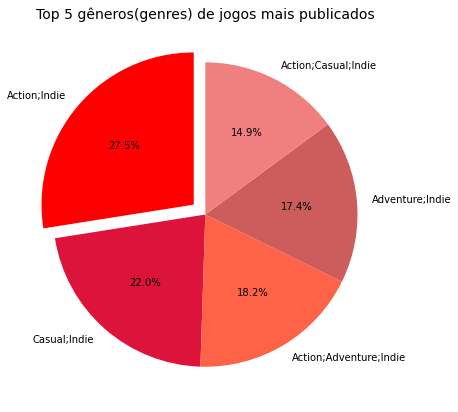

In [235]:
### Gráfico de Pizza utilizando os valores e gêneros

names=["Action;Indie","Casual;Indie","Action;Adventure;Indie","Adventure;Indie","Action;Casual;Indie"]
values=[1852,1482,1229,1170,1004]

destaque = (0.1,0,0,0,0)
#colors = ["crimson", "lightcoral", "indianred","brown","darkred"]
colors = ["red","crimson","tomato","indianred","lightcoral"]

#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']


plt.figure(figsize=(7,7))
plt.pie(x=values, labels=names,explode=destaque, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Top 5 gêneros(genres) de jogos mais publicados", fontsize=14)

plt.show()

### Quais as empresas que mais publicam(publishers) jogos?

In [162]:
### Quais as empresas que mais publicam(publishers) jogos?

top_publishers = df["publisher"].value_counts().head(5)
top_publishers

Big Fish Games    212
Strategy First    136
Ubisoft           111
THQ Nordic         98
Square Enix        97
Name: publisher, dtype: int64

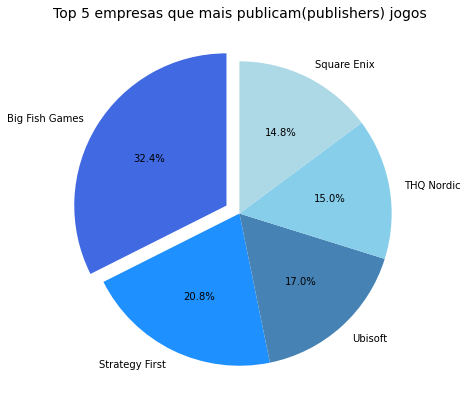

In [233]:
### Gráfico de pizza utilizando publishers de jogos


names=["Big Fish Games","Strategy First","Ubisoft","THQ Nordic","Square Enix"]
values=[212,136,111,98,97]

destaque = (0.1,0,0,0,0)
#colors = ["lightblue", "skyblue", "steelblue", "dodgerblue", "royalblue"]
colors = ["royalblue", "dodgerblue","steelblue","skyblue","lightblue"]

#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

plt.figure(figsize=(7,7))
plt.pie(x=values, labels=names,explode=destaque, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Top 5 empresas que mais publicam(publishers) jogos", fontsize=14)

plt.show()

### 3. Terceira Pergunta

#### É possível realizar o uso de kmeans em algum dos dados? é possível entender alguma coisa com isso? Em que preço de jogos as publishers costumam trabalhar?

In [240]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [241]:
df.sort_values(by='achievements',ascending=False).head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,avaliacao_total
12604,573060,LOGistICAL,2017-02-15,1,Sacada,Sacada,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Strategy,Casual;Strategy;Indie,9821,125,35,0,0,50000-100000,6.99,90
14735,640310,Drive-By Hero,2017-06-19,1,Idea Cabin,Idea Cabin,windows;mac;linux,0,Single-player;Steam Achievements,Violent;Gore;Action;Casual;Indie;Early Access,Early Access;Action;Indie,5394,45,78,0,0,0-20000,1.59,-33
20246,796900,Trivia Vault: Mixed Trivia 2,2018-02-13,1,Ripknot Systems,Ripknot Systems,windows,0,Single-player;Steam Achievements,Action;Casual;Indie;Simulation,Indie;Casual;Simulation,5000,15,7,0,0,0-20000,14.99,8
16525,690240,Trivia Vault: Classic Rock Trivia,2017-08-17,1,Ripknot Systems,Ripknot Systems,windows,0,Single-player;Steam Achievements,Action;Casual;Indie;Simulation;Strategy,Strategy;Casual;Action,5000,30,12,0,0,0-20000,9.99,18
16414,687490,Trivia Vault: Super Heroes Trivia,2017-08-15,1,Ripknot Systems,Ripknot Systems,windows,0,Single-player;Steam Achievements,Casual;Indie;Simulation;Strategy,Strategy;Indie;Casual,5000,28,17,0,0,0-20000,9.99,11
22026,851520,Trivia Vault: TV Trivia,2018-05-03,1,Ripknot Systems,Ripknot Systems,windows,0,Single-player;Steam Achievements,Action;Casual;Simulation;Strategy,Strategy;Casual;Simulation,5000,8,7,0,0,0-20000,9.99,1
16630,693250,Panda Run,2017-08-31,1,Jam,Jam,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,5000,14,19,0,0,0-20000,0.79,-5
15296,658430,Professor Watts Word Search: Into The Ocean,2017-07-16,1,Ripknot Systems,Ripknot Systems,windows,0,Single-player;Steam Achievements,Casual;Indie;Strategy,Indie;Casual;Strategy,5000,16,9,0,0,0-20000,4.99,7
21961,849550,Depth Siege Atlantis,2018-05-04,1,Red Dolphin Games,VT Publishing,windows,0,Single-player;Steam Achievements,Action;Casual,Action;Casual,5000,12,16,0,0,0-20000,3.99,-4
16351,685390,Pain Train PainPocalypse,2017-08-11,1,Virtual Top,VT Publishing,windows,0,Single-player;Steam Achievements,Action;Indie,Action;Indie;Gore,5000,31,37,0,0,0-20000,3.99,-6


In [242]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

fit = df.apply(lambda x: d[x.name].fit_transform(x))

fit.apply(lambda x: d[x.name].inverse_transform(x))

df = df.apply(lambda x: d[x.name].transform(x))

df['price'] = d['price'].inverse_transform(df['price'])


In [ ]:
# Normalização dos Dados
# mm = preprocessing.MinMaxScaler()
# columns_name = df.columns.copy()

# df = pd.DataFrame(mm.fit_transform(df))

# df.columns = columns_name

In [243]:
# df = df.apply(lambda x: d[x.name].inverse_transform(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  int32  
 2   release_date      27075 non-null  int32  
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  int32  
 5   publisher         27075 non-null  int32  
 6   platforms         27075 non-null  int32  
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  int32  
 9   genres            27075 non-null  int32  
 10  steamspy_tags     27075 non-null  int32  
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  int32 

In [244]:
clf = KMeans(n_clusters=5)

# col = ['name', 'publisher', 'price', 'categories', 'platforms', 'achievements']
col = ['publisher', 'price']


clf.fit(df[col])
# clf.fit(df)

KMeans(n_clusters=5)

In [245]:
df[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   publisher  27075 non-null  int32  
 1   price      27075 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 317.4 KB


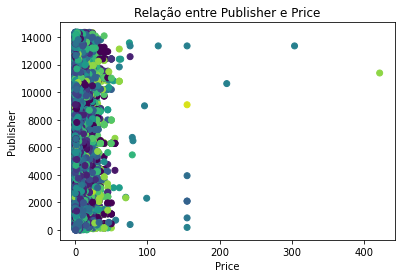

In [246]:
plt.title('Relação entre Publisher e Price')
plt.ylabel('Publisher')
plt.xlabel('Price')
plt.scatter(df['price'], df['publisher'], c=df.genres)

(0.0, 100.0)

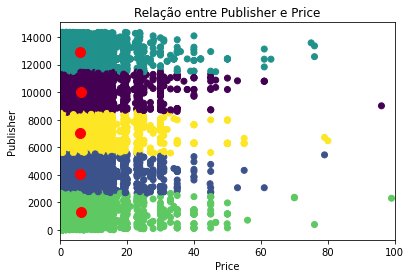

In [247]:
plt.title('Relação entre Publisher e Price')
plt.ylabel('Publisher')
plt.xlabel('Price')
plt.scatter(df['price'], df['publisher'], c=clf.labels_)

plt.scatter(clf.cluster_centers_[:,1],clf.cluster_centers_[:,0], s = 100, c = 'red')

plt.xlim(0,100)

In [248]:
print('Tamanho dos Cluster: ')
print(len(df[clf.labels_==0]))
print(len(df[clf.labels_==1]))
print(len(df[clf.labels_==2]))
print(len(df[clf.labels_==3]))
print(len(df[clf.labels_==4]))

Tamanho dos Cluster: 
5587
5569
5147
5447
5325


### Resposta

Um padrão que encontramos foi que o tamanho dos clusters ficam próximos, como mostra o resultado acima e como dá para verificar pelo gráfico. Outro resultado que encontramos foi que geralmente as empresas que mais vendem, tem os preços dos jogos abaixo de 100 dólares, perdendo sua alta frequência por volta dos 40.
Porém, é valido ressaltar que o kmeans não foi aplicado em sua totalidade, ou seja, tentamos ao máximo mostrar que sabemos utilizar o procedimento, mas nem sempre o dataset ajuda.

## Conclusão

#### Resultados resumidos

 ◉ Os 5 jogos com maiores avaliações positivas brutas foram: Counter Strike: Global Offensive, Dota2, Team Fortress 2, PlayerUnknown's Battlegrounds e Garry's Mod.

 ◉ Os 5 jogos com maiores avaliações negativas brutas foram: PlayerUnknown's Battlegrounds, Counter Strike: Global Offensive, Dota2, Grand Theft Auto V e Z1 Battle Royale.

 ◉ Os 5 jogos com maiores avaliações positivas em relação às negativas foram: Counter-Strike: Global Offensive, Dota2, Team Fortress 2, Garry's Mod e Unturned.

Ou seja, quando temos um jogo que está presente em primeiro lugar de avaliações negativas e simplesmente some nos gráficos de relação entre positivas e negativas, algo existe ali. A empresa certamente deve melhorar o jogo, pois se está havendo uma alta reclamação, o suficiente para esconder a avaliação positiva quando comparadas, o jogo está passando por problemas, sejam problemas de otimização ou algo do tipo.

 ◉ Os 5 gêneros de jogos mais publicados foram: ação;indie, casual;indie, ação;aventura;indie, aventura;indie e ação;casual;indie.

As 5 empresas que mais publicaram jogos foram: Big Fish Games, Strategy first, Ubisoft, THQ Nordic e Square Enix.

A Big fish games é a produto de vários games point and click, como aqueles de anúncios na internet, jogos de procurar pistas de crimes e similares.

 ◉ Foi possível utilizar agrupamento com os dados, porém o uso do kmeans foi prejudicado pelo dataset inicial. Foi possível entender que nem todo dataset está apto ao kmeans, mas tentamos ao máximo uma maneira de demonstrar o uso. As publishers costumam trabalhar com uma boa frequência entre 0 - 20 dólares, diminuindo um pouco até 40 dólares e baixando muito sua frequência de games com preços acima disso.
    
#### Mas, por que são importantes?

Para produtoras, publicadoras ou analistas de preços, o dataset pode ser útil para ver em qual faxa de preço os consumidores costumam pagar e a partir de qual valor eles desistem. Privando algumas empresas indie a criar jogos caríssimos que não serão comprados e isso irá desestruturar a empresa. Sobre a análise de avaliações, é boa para ver se algum jogo está sendo muito jogado(ele precisa ser comprado para ser avaliado) e ao mesmo tempo muito mal avaliado, ou seja, é um alerta para as empresas de que o jogo é bom e os usuários estão clamando por melhorias nele, sejam melhorias de otimização ou o que quer que seja.

Também serve para as empresas como um espécie de guia do que o consumidor gosta, ou de que talvez se possa arriscar em um gênero não muito jogado e inovar, fugindo assim do "mais do mesmo" e conquistando jogadores que estão entediados.

#### Limitações e melhorias que podem ser feitas para trabalhos futuros.

Bom, como uma das limitações, citamos o uso do kmeans ou regressão linear, que foi muito complicado no dataset utilizado, a dispersão dos valores e a plotagem deles vista através do histograma é bem desfavorável. Uma melhoria seria exatamente essa, em uma próxima vez utilizar valores que se correlacionam, como uma característica de planta presente em várias espécies ou algo do tipo. 

É isso, espero que nosso trio tenha esclarecido tais dúvidas, agradeço pela oportunidade.

## Agradecimentos

Deixo claro aqui os agradecimentos do trio ao professor Yuri, seus ensinamentos e paciência que tem com seus alunos, para que alcacem um lugar no mercado de trabalho e sejam pessoas melhores, tomandos por seu exemplo. Obrigado!